In [236]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [271]:
X_false = np.arange(10)
X_false

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [272]:
np.random.seed(1)
train_test_split(X_false, test_size=0.5)

[array([3, 1, 7, 8, 5]), array([2, 9, 6, 4, 0])]

In [273]:
np.random.seed(1)
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [274]:
X_treino.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
394,1,24.00,3,0,2,16.7000
851,0,74.00,3,0,0,7.7750
373,0,22.00,1,0,0,135.6333
523,1,44.00,1,0,1,57.9792
78,0,0.83,2,0,2,29.0000


In [275]:
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((445, 6), (446, 6), (445,), (446,))

In [340]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [277]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [278]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [279]:
p = model.predict(X_valid)

In [280]:
np.mean(y_valid == p)

0.7802690582959642

In [281]:
p = (X_valid['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid == p)

0.7623318385650224

## Validação Cruzada Cross Validation

In [282]:
X_false

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [283]:
?KFold

In [284]:
from sklearn.model_selection import RepeatedKFold

In [285]:
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=rep)
for linhas_treino, linhas_valid in kf.split(X_false):
    print('Treino', linhas_treino)
    print('Valid', linhas_valid)
    print()

Treino [0 3 5 6 9]
Valid [1 2 4 7 8]

Treino [1 2 4 7 8]
Valid [0 3 5 6 9]

Treino [0 1 3 5 8]
Valid [2 4 6 7 9]

Treino [2 4 6 7 9]
Valid [0 1 3 5 8]

Treino [2 5 6 8 9]
Valid [0 1 3 4 7]

Treino [0 1 3 4 7]
Valid [2 5 6 8 9]

Treino [0 1 3 6 8]
Valid [2 4 5 7 9]

Treino [2 4 5 7 9]
Valid [0 1 3 6 8]

Treino [0 1 7 8 9]
Valid [2 3 4 5 6]

Treino [2 3 4 5 6]
Valid [0 1 7 8 9]

Treino [0 2 4 6 9]
Valid [1 3 5 7 8]

Treino [1 3 5 7 8]
Valid [0 2 4 6 9]

Treino [0 4 5 7 8]
Valid [1 2 3 6 9]

Treino [1 2 3 6 9]
Valid [0 4 5 7 8]

Treino [0 1 2 4 8]
Valid [3 5 6 7 9]

Treino [3 5 6 7 9]
Valid [0 1 2 4 8]

Treino [0 2 4 7 9]
Valid [1 3 5 6 8]

Treino [1 3 5 6 8]
Valid [0 2 4 7 9]

Treino [0 1 2 3 9]
Valid [4 5 6 7 8]

Treino [4 5 6 7 8]
Valid [0 1 2 3 9]



In [137]:
resultados = []
for rep in range(10):
    print ('Rep:', rep)
    kf = KFold(2 ,shuffle=True, random_state=rep)
    for linhas_treino, linhas_valid in kf.split(X):
        print('Treino', linhas_treino.shape[0])
        print('Valid', linhas_valid.shape[0])
        print()
    
        X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
        model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        model.fit(X_treino, y_treino)
    
        p = model.predict(X_valid)
        acc = np.mean(y_valid == p)
        resultados.append(acc)
        print('ACC:', acc)
        print()
    
        #print(X_treino.head())
        #print()

Rep: 0
Treino 445
Valid 446

ACC: 0.7713004484304933

Treino 446
Valid 445

ACC: 0.7797752808988764

Rep: 1
Treino 445
Valid 446

ACC: 0.7443946188340808

Treino 446
Valid 445

ACC: 0.7955056179775281

Rep: 2
Treino 445
Valid 446

ACC: 0.7757847533632287

Treino 446
Valid 445

ACC: 0.7887640449438202

Rep: 3
Treino 445
Valid 446

ACC: 0.7533632286995515

Treino 446
Valid 445

ACC: 0.7573033707865169

Rep: 4
Treino 445
Valid 446

ACC: 0.7354260089686099

Treino 446
Valid 445

ACC: 0.7415730337078652

Rep: 5
Treino 445
Valid 446

ACC: 0.7219730941704036

Treino 446
Valid 445

ACC: 0.7056179775280899

Rep: 6
Treino 445
Valid 446

ACC: 0.7757847533632287

Treino 446
Valid 445

ACC: 0.7303370786516854

Rep: 7
Treino 445
Valid 446

ACC: 0.7040358744394619

Treino 446
Valid 445

ACC: 0.7348314606741573

Rep: 8
Treino 445
Valid 446

ACC: 0.7488789237668162

Treino 446
Valid 445

ACC: 0.7887640449438202

Rep: 9
Treino 445
Valid 446

ACC: 0.7623318385650224

Treino 446
Valid 445

ACC: 0.78426966

In [139]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for linhas_treino, linhas_valid in kf.split(X):
    print('Treino', linhas_treino.shape[0])
    print('Valid', linhas_valid.shape[0])
    print()
    
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    model.fit(X_treino, y_treino)
    
    p = model.predict(X_valid)
    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print('ACC:', acc)
    print()
    
        #print(X_treino.head())
        #print()

Treino 445
Valid 446

ACC: 0.7511210762331838

Treino 446
Valid 445

ACC: 0.7617977528089888

Treino 445
Valid 446

ACC: 0.7533632286995515

Treino 446
Valid 445

ACC: 0.7595505617977528

Treino 445
Valid 446

ACC: 0.7690582959641256

Treino 446
Valid 445

ACC: 0.7573033707865169

Treino 445
Valid 446

ACC: 0.7399103139013453

Treino 446
Valid 445

ACC: 0.7595505617977528

Treino 445
Valid 446

ACC: 0.7354260089686099

Treino 446
Valid 445

ACC: 0.797752808988764

Treino 445
Valid 446

ACC: 0.7690582959641256

Treino 446
Valid 445

ACC: 0.7640449438202247

Treino 445
Valid 446

ACC: 0.7757847533632287

Treino 446
Valid 445

ACC: 0.7573033707865169

Treino 445
Valid 446

ACC: 0.7556053811659192

Treino 446
Valid 445

ACC: 0.7640449438202247

Treino 445
Valid 446

ACC: 0.7443946188340808

Treino 446
Valid 445

ACC: 0.7595505617977528

Treino 445
Valid 446

ACC: 0.7533632286995515

Treino 446
Valid 445

ACC: 0.7640449438202247



In [251]:
resultados

[0.7869955156950673,
 0.7797752808988764,
 0.827354260089686,
 0.8179775280898877,
 0.7847533632286996,
 0.7842696629213484,
 0.8161434977578476,
 0.7842696629213484,
 0.8004484304932735,
 0.8,
 0.8183856502242153,
 0.802247191011236,
 0.8116591928251121,
 0.8067415730337079,
 0.820627802690583,
 0.7887640449438202,
 0.8385650224215246,
 0.8044943820224719,
 0.7982062780269058,
 0.8112359550561797]

In [252]:
np.mean(resultados)

0.8041457147175896

In [253]:
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/home/alestan/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <a list of 10 Patch objects>)

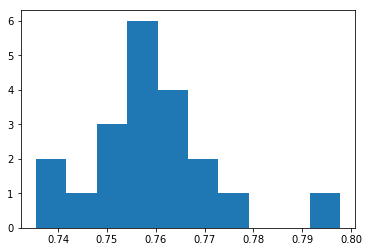

In [145]:
pylab.hist(resultados)

In [341]:
def transformar_sex(valor):
    if valor == 'female':
        return 1
    else:
        return 0
train['Sex_binario'] = train['Sex'].map(transformar_sex)

In [342]:
train['Sex_binario'] = train['Sex'].map(transformar_sex)
test['Sex_binario'] = test['Sex'].map(transformar_sex)

In [337]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [306]:
variables = ['Sex_binario', 'Age']

In [307]:
X = train[variables]
y = train['Survived']

In [308]:
X.head()

,Sex_binario,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [309]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [325]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [326]:
X_prev = test[variables]
X_prev = X_prev.fillna(-1)

KeyError: "['Sex_binario'] not in index"

In [312]:
X = X.fillna(-1)

In [313]:
X_prev.head()

,Sex_binario,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [314]:
p = model.predict(X_prev)
p

ValueError: Number of features of the model must match the input. Model n_features is 6 and input n_features is 2 

## Novas variáveis

modeloAnterior = 0.759601451100922

In [338]:
variables = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [339]:
X = train[variables].fillna(-1)
y = train['Survived']

In [317]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for linhas_treino, linhas_valid in kf.split(X):
    print('Treino', linhas_treino.shape[0])
    print('Valid', linhas_valid.shape[0])
    print()
    
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    model.fit(X_treino, y_treino)
    
    p = model.predict(X_valid)
    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print('ACC:', acc)
    print()
    
    #print(X_treino.head())
    #print()

Treino 445
Valid 446

ACC: 0.7869955156950673

Treino 446
Valid 445

ACC: 0.7797752808988764

Treino 445
Valid 446

ACC: 0.827354260089686

Treino 446
Valid 445

ACC: 0.8179775280898877

Treino 445
Valid 446

ACC: 0.7847533632286996

Treino 446
Valid 445

ACC: 0.7842696629213484

Treino 445
Valid 446

ACC: 0.8161434977578476

Treino 446
Valid 445

ACC: 0.7842696629213484

Treino 445
Valid 446

ACC: 0.8004484304932735

Treino 446
Valid 445

ACC: 0.8

Treino 445
Valid 446

ACC: 0.8183856502242153

Treino 446
Valid 445

ACC: 0.802247191011236

Treino 445
Valid 446

ACC: 0.8116591928251121

Treino 446
Valid 445

ACC: 0.8067415730337079

Treino 445
Valid 446

ACC: 0.820627802690583

Treino 446
Valid 445

ACC: 0.7887640449438202

Treino 445
Valid 446

ACC: 0.8385650224215246

Treino 446
Valid 445

ACC: 0.8044943820224719

Treino 445
Valid 446

ACC: 0.7982062780269058

Treino 446
Valid 445

ACC: 0.8112359550561797



(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <a list of 10 Patch objects>)

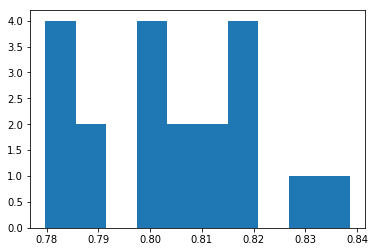

In [318]:
pylab.hist(resultados)

In [319]:
np.mean(resultados)

0.8041457147175896

# Retreinar o modelo

In [331]:
X.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [332]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [344]:
test[variables].head

<bound method NDFrame.head of      Sex_binario   Age  Pclass  SibSp  Parch      Fare
0              0  34.5       3      0      0    7.8292
1              1  47.0       3      1      0    7.0000
2              0  62.0       2      0      0    9.6875
3              0  27.0       3      0      0    8.6625
4              1  22.0       3      1      1   12.2875
..           ...   ...     ...    ...    ...       ...
413            0   NaN       3      0      0    8.0500
414            1  39.0       1      0      0  108.9000
415            0  38.5       3      0      0    7.2500
416            0   NaN       3      0      0    8.0500
417            0   NaN       3      1      1   22.3583

[418 rows x 6 columns]>

In [334]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(X, y)
    
p = model.predict(test[variables])

KeyError: "['Sex_binario'] not in index"

## CRIAR SUBMISSION

In [ ]:
sub = pd.Series(p, index=test['PassengerId'],name='Survived')
sub.shape

In [ ]:
sub.to_csv("model2.csv", header=True)

In [ ]:
!head -n10 first_model.csv